<a href="https://colab.research.google.com/github/Nik211885/Hello_HTML5/blob/master/linear_regrssion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./sample_data/california_housing_train.csv',usecols=['total_rooms','total_bedrooms','median_income','median_house_value'])

In [6]:
df.head(10)

,total_rooms,total_bedrooms,median_income,median_house_value
0,5612.0,1283.0,1.4936,66900.0
1,7650.0,1901.0,1.8200,80100.0
2,720.0,174.0,1.6509,85700.0
3,1501.0,337.0,3.1917,73400.0
4,1454.0,326.0,1.9250,65500.0
5,1387.0,236.0,3.3438,74000.0
6,2907.0,680.0,2.6768,82400.0
7,812.0,168.0,1.7083,48500.0
8,4789.0,1175.0,2.1782,58400.0
9,1497.0,309.0,2.1908,48100.0


In [7]:
print('So du lieu bi nan')
for label in df.columns[0:]:
  print(f'{label}:{df[label].isnull().sum()}')


So du lieu bi nan
total_rooms:0
total_bedrooms:0
median_income:0
median_house_value:0


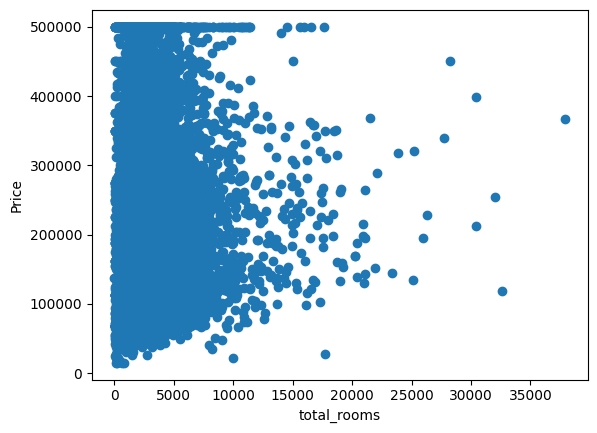

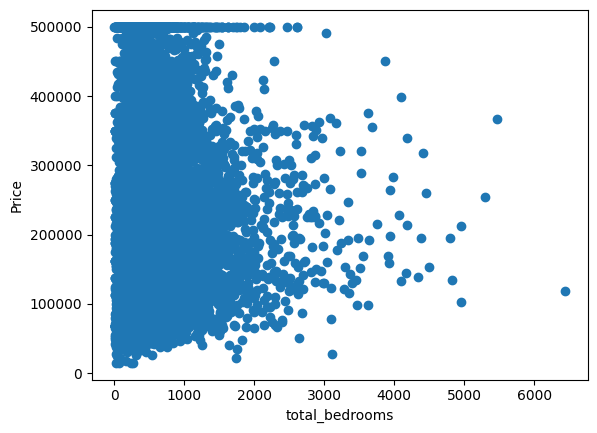

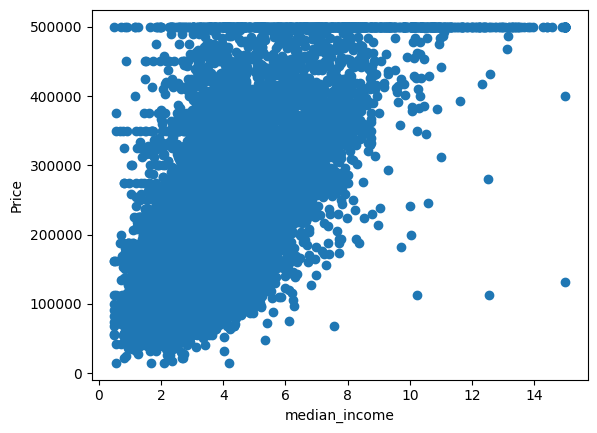

In [8]:
for label in df.columns[:-1]:
  plt.scatter(df[label],df['median_house_value'])
  plt.xlabel(label)
  plt.ylabel('Price')
  plt.show()

In [9]:
x_train = np.array(df[df.columns[:-1]])
y_train = np.array(df[df.columns[-1]]).reshape(-1,1)

In [166]:
w = np.zeros(3)
b = 0

In [11]:
print(w.shape)

(3,)


In [12]:
print(x_train.shape)

(17000, 3)


In [13]:
def linear_model_funtion(w,b,x):
  return np.sum(w*x) + b

In [14]:
def cost_funtion(w,x,b,y):
  cost = 0
  m = y.size
  for i in range(m):
    cost += (linear_model_funtion(w,b,x[i])-y[i])**2
  return cost/(2*m)

In [15]:
y_train.shape

(17000, 1)

In [16]:
y_train[1500]

array([192200.])

In [17]:
x_train[0].shape

(3,)

In [18]:
y_train.size

17000

In [19]:
cost_funtion(w,x_train,b,y_train)[0]

28212555277.965237

In [20]:
def gradient(w,b,x,y):
  grd_w = np.zeros(3)
  grd_b = 0
  m = y.size
  for j in range(3):
    for i in range(m):
      if(not grd_b):
        grd_b = (linear_model_funtion(w,b,x[i]) - y[i])
      grd_w[j] += (linear_model_funtion(w,b,x[i]) - y[i]) * x[i][j]
  return [grd_w/m ,grd_b/m]


In [86]:
def _learning_rate(w,b,x,y,lr = 0.01):
  cost = cost_funtion(w,x,b,y)
  grd_w ,grd_b = gradient(w,b,x,y)
  while(True):
    tmp_w = w.copy()
    tmp_b = b
    for i in range(grd_w.size):
      tmp_w[i] -= lr*grd_w[i]
    tmp_b -= lr*grd_b
    if(cost_funtion(tmp_w,x,tmp_b,y) > cost):
      lr = lr /10
    else:
      return lr

In [48]:
def gradient_descent(w,b,x,y,learning_rate=0.001):
  grd_w, grd_b = gradient(w,b,x,y)
  for i in  range(w.size):
    w[i] -= learning_rate*grd_w[i]
  b -= learning_rate*grd_b
  return w,b

In [164]:
def linear_regrssion_model(w,b,x,y,learning_rate=0.01):
  lr = _learning_rate(w,b,x,y,lr = learning_rate)
  for _ in range(50):
    print(lr)
    w,b = gradient_descent(w,b,x,y,learning_rate=lr)
  return w,b

In [167]:
w, b = linear_regrssion_model(w,b,x_train,y_train)

1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.0000000000000002e-07
1.000000000

In [168]:
print(w)

[46.82317257 13.84419766  2.09676114]


In [169]:
print(b)

[-6.13571094e-05]


In [170]:
cost_funtion(w,x_train,b,y_train)[0]

13813896257.21995